## Final Project Submission

Please fill out:
* Student name: Jeremiah Waiguru
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Mwikali
* Blog post URL: N/A


# Overview

This project analyzes movies datasets from various movie rating sites (through Exploratory Data Analysis), to assist the head of Microsoft's new movie studio  in deciding what type of films to create under their new venture.

# Business understanding

Microsoft faces the challenge of competing against industry giants armed with historical industry insights.
To thrive in this competitive industry , microsoft needs to strategically determine the types of movies that are most likely to succeed in terms of profitability,production cost and its popularity

Business understanding in this scenario involves microsoft recognizing the opportunity to enter the film industry, specifically by establishing a new movie studio .This decision is driven by observation that many successful companies are creating original video content, and microsoft wants to leverage its resources and brand to tap into this market



# Business Objectives

1. Find out if venturing into the firm industry is a viable business idea for microsoft
2. Find out what how production cost is related to the total revenue
3. Find out how popularity of a movie relates to its vote count

# Data Understanding

In this project we will be analyzing the following datasets: Box office Mojo, IMDB (Internet Movie Database) and the numbers'.
We'll now load the datasets below;

# Load libraries


In [148]:
# importing packages that we will use in this project
import csv
import pandas as pd
# setting pandas display to avoid scientific notation in the dataframes
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import sqlite3
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# 1. Work on the bom.movie_gross.csv dataset

In [91]:
# loading the dataset
movie_gross = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000,2010
3,Inception,WB,292600000.00,535700000,2010
4,Shrek Forever After,P/DW,238700000.00,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,NaN,2018
3383,Edward II (2018 re-release),FM,4800.00,NaN,2018
3384,El Pacto,Sony,2500.00,NaN,2018
3385,The Swan,Synergetic,2400.00,NaN,2018


# Breakdown to understand our data

The DataFrame has 3387 rows and 5 columns.
## Columns:
1. title - the title of the movie
2. studio - where the movie was produced
3. domestic_gross - the domestic gross revenue of the movie in dollars
4. foreign_gross - the foreign gross revenue of the movie in dollars
5. year - the year in which the movie was produced

In [92]:
movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [93]:
movie_gross.isna().any()

title             False
studio             True
domestic_gross     True
foreign_gross      True
year              False
dtype: bool

In [94]:
movie_gross.isna().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [95]:
movie_gross.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

### from the above information

1. we see the columns have different data types; object, float and integer
2. studio column, domestic_gross and foreign_gross  has missing data
3. foreign_gross has object as the data type yet it should be in float data type

N/B: missing data and the data type problem will be dealt with while cleaning the data

### summary statistics of the domestic gross

In [96]:
# descriptive statistics 
movie_gross['domestic_gross'].describe()

count        3359.00
mean     28745845.07
std      66982498.24
min           100.00
25%        120000.00
50%       1400000.00
75%      27900000.00
max     936700000.00
Name: domestic_gross, dtype: float64

1. The mean of the  columm is approximately 28.75 million dollars
2. The standard deviation is approximately 66.98 million dollars
3. Minimum value in the column is 1oo dollars, this shows that some movies in the dataset made very little money
4. Maximum value in the column is 936.7 million dollars to show that some movies in the dataset made huge profits domestically


In [97]:
movie_gross['foreign_gross'].describe()

count        2037
unique       1204
top       1200000
freq           23
Name: foreign_gross, dtype: object

1. The count is 2037 non_null values  meaning there are missing values  since we expect our count to be 3387.
2. The unique count shows that there are unique values in the column adding upto 1204
3. Top value in the column is 1.2 million dollars and it appears 23 times meaning there are 23 movies that made 1.2 million dollars in the foreign markets
4. freq shows the number of times a top value appears in column.

# 2. Work on the tmdb.movies dataset

In [98]:
# loading the dataset
tmdb_movie = pd.read_csv("C:\\Users\\JEREMY\\Downloads\\MORINGA 1\\dsc-phase-1-project-v2-4\\zippedData\\tmdb.movies.csv.gz", index_col=0)
tmdb_movie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


In [99]:
tmdb_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [100]:
tmdb_movie.isna().any()

genre_ids            False
id                   False
original_language    False
original_title       False
popularity           False
release_date         False
title                False
vote_average         False
vote_count           False
dtype: bool

In [101]:
tmdb_movie.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [102]:
tmdb_movie.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
26512    False
26513    False
26514    False
26515    False
26516    False
Length: 26517, dtype: bool

from the above information;
Our dataset is clean, no missing  data

# 3. work on movie budgets dataset

In [103]:
# load the data
movie_budgets = pd.read_csv("C:\\Users\\JEREMY\\Downloads\\MORINGA 1\\dsc-phase-1-project-v2-4\\zippedData\\tn.movie_budgets.csv.gz")
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [104]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [105]:
movie_budgets.isna().any()

id                   False
release_date         False
movie                False
production_budget    False
domestic_gross       False
worldwide_gross      False
dtype: bool

In [106]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [107]:
movie_budgets.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

Likewise, the above dataset is clean with no missing data

## 4.  Work on rt reviews dataset

In [108]:
rt_movie = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t', encoding='unicode_escape')
rt_movie.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [109]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [110]:
rt_movie.isna().any()

id              False
synopsis         True
rating           True
genre            True
director         True
writer           True
theater_date     True
dvd_date         True
currency         True
box_office       True
runtime          True
studio           True
dtype: bool

In [111]:
rt_movie.isna().sum()

id                 0
synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

# Data Cleaning

Here we are going to clean the data to make it meaningfull for analysis

## Cleaning the Movie_gross dataset

In [112]:
# first we convert the data type from object to float
movie_gross['foreign_gross'] = pd.to_numeric(movie_gross['foreign_gross'],errors='coerce')
movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,nan,2018
3383,Edward II (2018 re-release),FM,4800.00,nan,2018
3384,El Pacto,Sony,2500.00,nan,2018
3385,The Swan,Synergetic,2400.00,nan,2018


In [113]:
# confirm if now the foreign_gross column will give us descriptive statistics values
movie_gross['foreign_gross'].describe()

count        2032.00
mean     75057041.63
std     137529351.20
min           600.00
25%       3775000.00
50%      18900000.00
75%      75050000.00
max     960500000.00
Name: foreign_gross, dtype: float64

## lets now replace the missing data

In [114]:
# Replacing missing values in the studio column
movie_gross['studio'].fillna('None', inplace = True)

# Replacing missing values in domestic_gross column
movie_gross['domestic_gross'].fillna(0, inplace = True)

# Replacing missing values in foreign_gross column
movie_gross['foreign_gross'].fillna(0, inplace = True)

movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.00,652000000.00,2010
1,Alice in Wonderland (2010),BV,334200000.00,691300000.00,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.00,664300000.00,2010
3,Inception,WB,292600000.00,535700000.00,2010
4,Shrek Forever After,P/DW,238700000.00,513900000.00,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.00,0.00,2018
3383,Edward II (2018 re-release),FM,4800.00,0.00,2018
3384,El Pacto,Sony,2500.00,0.00,2018
3385,The Swan,Synergetic,2400.00,0.00,2018


In [115]:
# confirming there is no any missing data
movie_gross.isna().sum()

title             0
studio            0
domestic_gross    0
foreign_gross     0
year              0
dtype: int64

In [116]:
movie_gross.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
3382    False
3383    False
3384    False
3385    False
3386    False
Length: 3387, dtype: bool

## lets clean movie budgets

In [117]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [118]:
movie_budgets.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

from the information above, our dataset is clean but we now want to convert data type of production_budget, domestic_gross, worldwide_gross from object to float

In [119]:
# change data type of production budget to float
movie_budgets['production_budget'] = movie_budgets['production_budget'].replace('[^.0-9]', '', regex=True).astype(float)

# change data type of domestic_gross
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].replace('[^.0-9]', '', regex=True).astype(float)

# change data type of worldwide_gross
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].replace('[^.0-9]', '', regex=True).astype(float)

movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


In [120]:
movie_budgets.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5777    False
5778    False
5779    False
5780    False
5781    False
Length: 5782, dtype: bool

In [121]:
# drop all the duplicates
movie_budgets.drop_duplicates(subset='movie', keep='first', inplace=True)
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00


## Merging dataframes 


In [122]:
merged_df = pd.merge(movie_gross, tmdb_movie, left_on='title', right_on='title', how='inner')
merged_df

,title,studio,domestic_gross,foreign_gross,year,genre_ids,id,original_language,original_title,popularity,release_date,vote_average,vote_count
0,Toy Story 3,BV,415000000.00,652000000.00,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,7.70,8340
1,Inception,WB,292600000.00,535700000.00,2010,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,8.30,22186
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.04,2010-05-16,6.10,3843
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.34,2010-06-23,6.00,4909
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,6.80,12368
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2698,The Escape,IFC,14000.00,0.00,2018,"[53, 28]",459814,en,The Escape,0.60,2015-08-14,7.00,1
2699,The Escape,IFC,14000.00,0.00,2018,"[53, 28]",417004,en,The Escape,1.18,2016-10-23,6.60,10
2700,Souvenir,Strand,11400.00,0.00,2018,"[35, 18]",408258,fr,Souvenir,2.13,2016-09-08,5.80,14
2701,The Quake,Magn.,6200.00,0.00,2018,[12],416194,no,Skjelvet,11.05,2018-12-14,6.70,81


In [123]:
merged_df1 = pd.merge(merged_df, movie_budgets, left_on='title', right_on='movie', how='inner')
merged_df1

,title,studio,domestic_gross_x,foreign_gross,year,genre_ids,id_x,original_language,original_title,popularity,release_date_x,vote_average,vote_count,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.00,652000000.00,2010,"[16, 10751, 35]",10193,en,Toy Story 3,24.45,2010-06-17,7.70,8340,47,"Jun 18, 2010",Toy Story 3,200000000.00,415004880.00,1068879522.00
1,Inception,WB,292600000.00,535700000.00,2010,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,8.30,22186,38,"Jul 16, 2010",Inception,160000000.00,292576195.00,835524642.00
2,Shrek Forever After,P/DW,238700000.00,513900000.00,2010,"[35, 12, 14, 16, 10751]",10192,en,Shrek Forever After,15.04,2010-05-16,6.10,3843,27,"May 21, 2010",Shrek Forever After,165000000.00,238736787.00,756244673.00
3,The Twilight Saga: Eclipse,Sum.,300500000.00,398000000.00,2010,"[12, 14, 18, 10749]",24021,en,The Twilight Saga: Eclipse,20.34,2010-06-23,6.00,4909,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.00,300531751.00,706102828.00
4,Iron Man 2,Par.,312400000.00,311500000.00,2010,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,6.80,12368,15,"May 7, 2010",Iron Man 2,170000000.00,312433331.00,621156389.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,Bilal: A New Breed of Hero,VE,491000.00,1700000.00,2018,"[28, 12, 16]",332718,en,Bilal: A New Breed of Hero,2.71,2018-02-02,6.80,54,100,"Feb 2, 2018",Bilal: A New Breed of Hero,30000000.00,490973.00,648599.00
1374,Mandy,RLJ,1200000.00,0.00,2018,[18],499658,en,Mandy,0.60,2016-01-24,3.50,2,71,"Sep 14, 2018",Mandy,6000000.00,1214525.00,1427656.00
1375,Mandy,RLJ,1200000.00,0.00,2018,"[28, 53, 27, 14, 9648]",460885,en,Mandy,16.24,2018-09-13,6.20,618,71,"Sep 14, 2018",Mandy,6000000.00,1214525.00,1427656.00
1376,Lean on Pete,A24,1200000.00,0.00,2018,"[18, 12]",407890,en,Lean on Pete,9.31,2018-04-06,6.90,133,13,"Apr 6, 2018",Lean on Pete,8000000.00,1163056.00,2455027.00


# Exploratory Data Analysis


## 1. lets see profits made in movie production

In [124]:
# define profits
movie_budgets['profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']
movie_budgets['profit']

0      2351345279.00
1       635063875.00
2      -200237650.00
3      1072413963.00
4       999721747.00
            ...     
5777        -7000.00
5778       234495.00
5779        -3662.00
5780        -1400.00
5781       179941.00
Name: profit, Length: 5698, dtype: float64

In [125]:
movie_budgets['profit'] = sorted(movie_budgets['profit'], reverse=True)
movie_budgets['profit']

0      2351345279.00
1      2008208395.00
2      1748134200.00
3      1747311220.00
4      1433854864.00
            ...     
5777    -94635231.00
5778   -106900000.00
5779   -110450242.00
5780   -150000000.00
5781   -200237650.00
Name: profit, Length: 5698, dtype: float64

In [126]:
movie_budgets.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,2008208395.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,1748134200.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1747311220.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,1433854864.00
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000.00,936662225.00,2053311220.00,1328722794.00
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000.00,678815482.00,2048134200.00,1292935897.00
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,300000000.00,309420425.00,963420425.00,1216693157.00
8,9,"Nov 17, 2017",Justice League,300000000.00,229024295.00,655945209.00,1148258224.00
9,10,"Nov 6, 2015",Spectre,300000000.00,200074175.00,879620923.00,1135772799.00


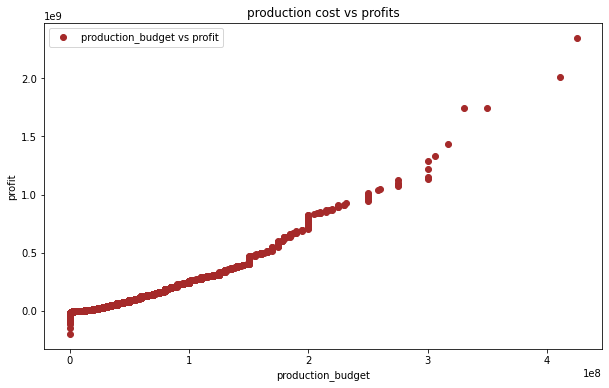

In [140]:
plt.figure(figsize=(10,6))
plt.scatter(data=movie_budgets, x='production_budget', y='profit', color='brown')

plt.xlabel('production_budget')
plt.ylabel('profit')
plt.title('production cost vs profits')
plt.legend(['production_budget vs profit'])
plt.show();

from the above information, we see that the production cost is directly related to the profits earned.
Greater investment in the production budget will lead to a greater portion of profits and vice versa.
it has a strong positive correlation

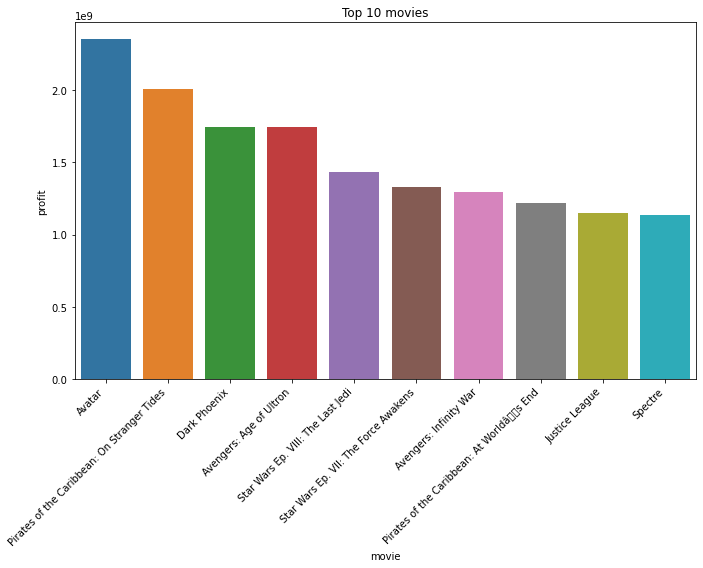

In [138]:
# bar plot showing top 10 movies in terms of most profits
plt.figure(figsize = (10, 8))
sns.barplot(x = 'movie', y = 'profit', data = movie_budgets.head(10), ci = None)
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel('movie')
plt.ylabel('profit')
plt.title('Top 10 movies')
plt.tight_layout()
plt.show()

from the above information, are the top ten movies making the most profits.

## 2. lets see relationship between domestic_gross and worldwide_gross

In [144]:
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,profit
0,1,"Dec 18, 2009",Avatar,425000000.00,760507625.00,2776345279.00,2351345279.00
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.00,241063875.00,1045663875.00,2008208395.00
2,3,"Jun 7, 2019",Dark Phoenix,350000000.00,42762350.00,149762350.00,1748134200.00
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000.00,459005868.00,1403013963.00,1747311220.00
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.00,620181382.00,1316721747.00,1433854864.00
...,...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000.00,0.00,0.00,-94635231.00
5778,79,"Apr 2, 1999",Following,6000.00,48482.00,240495.00,-106900000.00
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000.00,1338.00,1338.00,-110450242.00
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400.00,0.00,0.00,-150000000.00


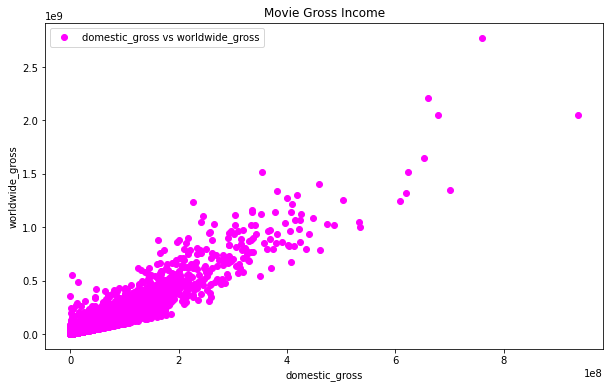

In [128]:
# show correlation between domestic_gross and worldwide_gross
plt.figure(figsize=(10,6))
plt.scatter(data=movie_budgets, x='domestic_gross', y='worldwide_gross', color='magenta')

plt.xlabel('domestic_gross')
plt.ylabel('worldwide_gross')
plt.title('Movie Gross Income')
plt.legend(['domestic_gross vs worldwide_gross'])
plt.show();

From the above scatterplot we can see a strong and positive correlation between the domestic and worldwide gross. There's a probability that if a movie does well in the domestic market, it will also do well in the worldwide market. 

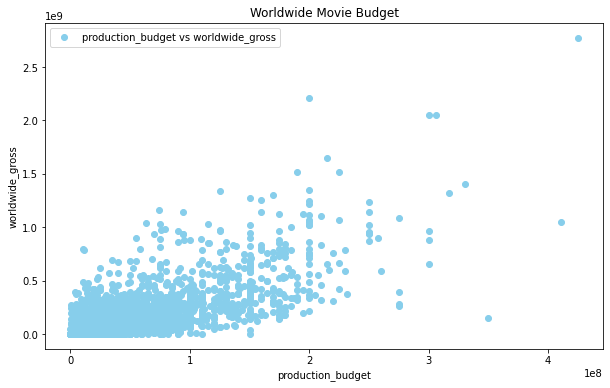

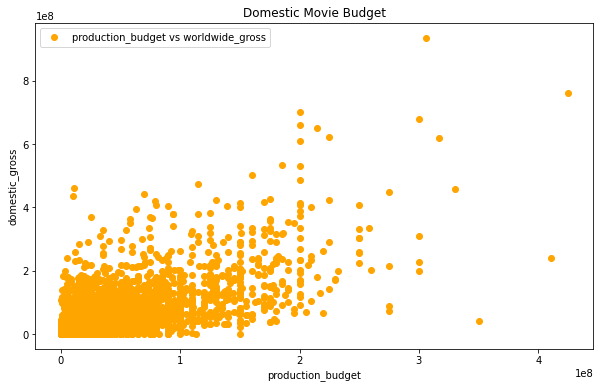

In [129]:
# 2 plots showing the corr between the production_budget and worldwide_gross / production_budget and domestic_gross
plt.figure(figsize=(10,6))
plt.scatter(data=movie_budgets, x='production_budget', y='worldwide_gross', color='skyblue')

plt.xlabel('production_budget')
plt.ylabel('worldwide_gross')
plt.title('Worldwide Movie Budget')
plt.legend(['production_budget vs worldwide_gross'])
plt.show();

plt.figure(figsize=(10,6))
plt.scatter(data=movie_budgets, x='production_budget', y='domestic_gross', color='orange')

plt.xlabel('production_budget')
plt.ylabel('domestic_gross')
plt.title('Domestic Movie Budget')
plt.legend(['production_budget vs worldwide_gross'])
plt.show()

There is positive correlation in both in both relationships, production budget with worlwide_gross and production budget with domestic_gross in both worldwide movie budget and domestic movie budget repectively.

# 3. Does popularity affect the vote counts of the movies

In [145]:
tmdb_movie

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.53,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.70,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.73,2010-03-26,How to Train Your Dragon,7.70,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.52,2010-05-07,Iron Man 2,6.80,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.00,1995-11-22,Toy Story,7.90,10174
4,"[28, 878, 12]",27205,en,Inception,27.92,2010-07-16,Inception,8.30,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.60,2018-10-13,Laboratory Conditions,0.00,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.60,2018-05-01,_EXHIBIT_84xxx_,0.00,1
26514,"[14, 28, 12]",381231,en,The Last One,0.60,2018-10-01,The Last One,0.00,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.60,2018-06-22,Trailer Made,0.00,1


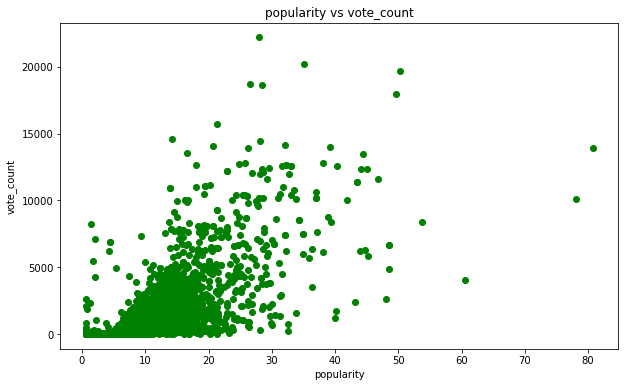

In [146]:
#  ploting to see corr between popularity and vote_count of the movies
plt.figure(figsize=(10,6))
plt.scatter(data=tmdb_movie, x='popularity', y='vote_count', color='green')

plt.xlabel('popularity')
plt.ylabel('vote_count')
plt.title('popularity vs vote_count')
plt.show();

from the above information, popularity has a weak positive relationship with vote_count of the movie.
the more the popular the movie is, the more the counts it has

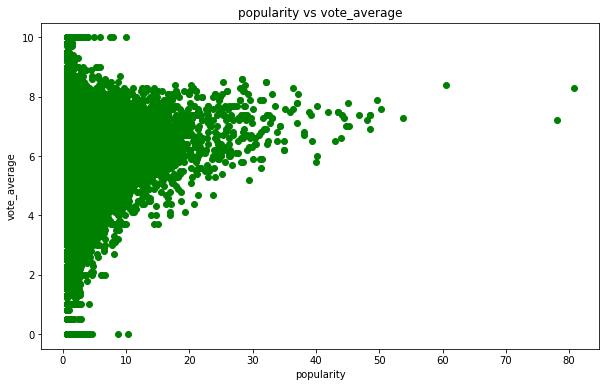

In [147]:
# plotting to see correlation between popularity and vote_average of the movies

plt.figure(figsize=(10,6))
plt.scatter(data=tmdb_movie, x='popularity', y='vote_average', color='green')

plt.xlabel('popularity')
plt.ylabel('vote_average')
plt.title('popularity vs vote_average')
plt.show();

the above correlation is a weak negative because the popularity does not affect the vote average directly.